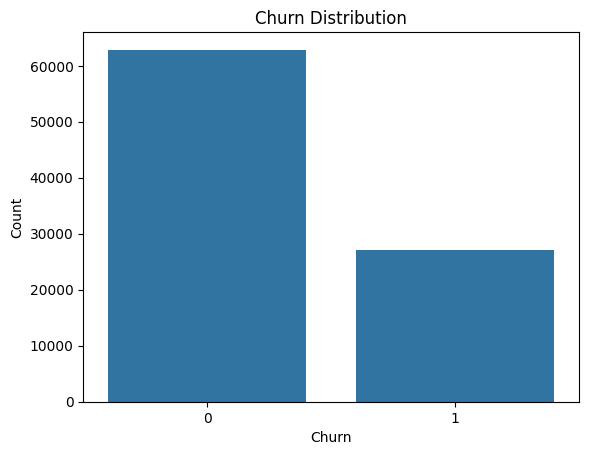

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas for DataFrame operations

# Load your data into a pandas DataFrame
# Replace 'your_data.csv' with the actual path to your data file
df = pd.read_csv('/content/Large_Customer_Churn_Prediction.csv')

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.savefig("churn_distribution.png", bbox_inches='tight')
plt.show()

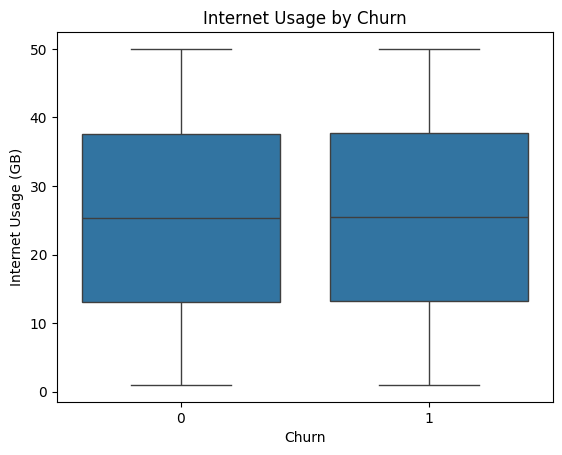

In [3]:
sns.boxplot(x='Churn', y='Internet_Usage_GB', data=df)
plt.title("Internet Usage by Churn")
plt.xlabel("Churn")
plt.ylabel("Internet Usage (GB)")
plt.savefig("internet_usage_churn.png", bbox_inches='tight')
plt.show()


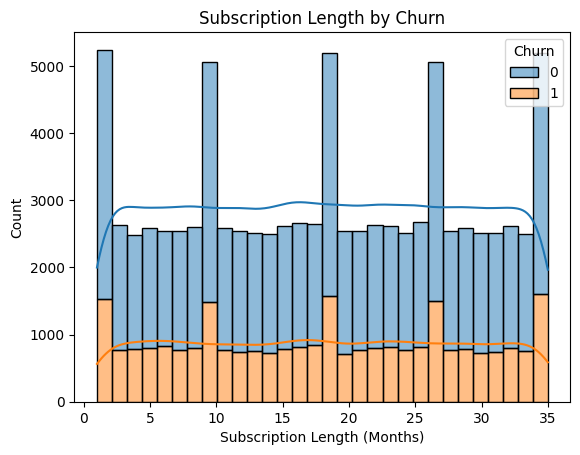

In [4]:
sns.histplot(data=df, x='Subscription_Length_Months', hue='Churn', bins=30, kde=True, multiple='stack')
plt.title("Subscription Length by Churn")
plt.xlabel("Subscription Length (Months)")
plt.ylabel("Count")
plt.savefig("subscription_length_churn.png", bbox_inches='tight')
plt.show()


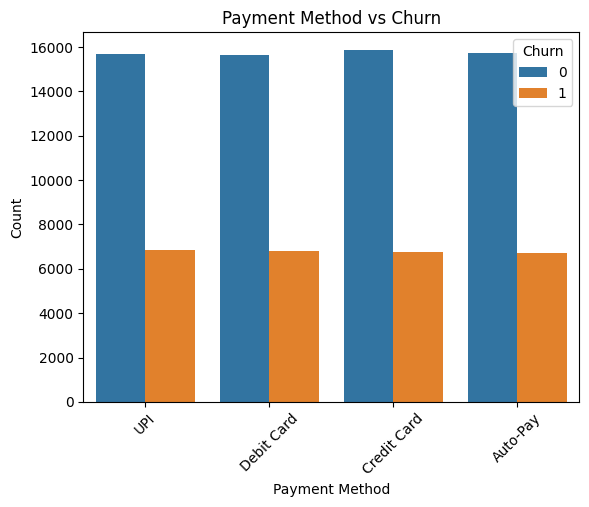

In [5]:
sns.countplot(x='Payment_Method', hue='Churn', data=df)
plt.title("Payment Method vs Churn")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.savefig("payment_method_churn.png", bbox_inches='tight')
plt.show()


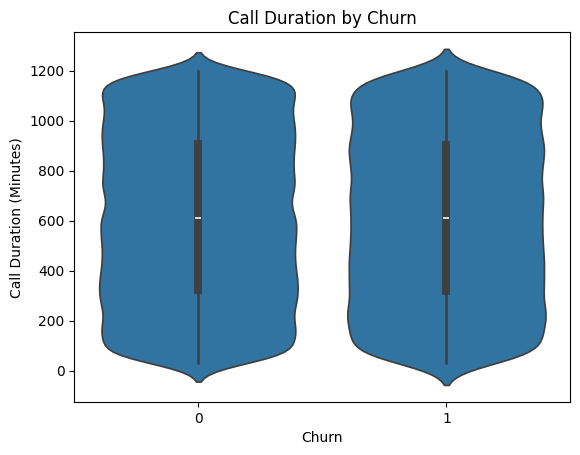

In [6]:
sns.violinplot(x='Churn', y='Call_Duration_Minutes', data=df)
plt.title("Call Duration by Churn")
plt.xlabel("Churn")
plt.ylabel("Call Duration (Minutes)")
plt.savefig("call_duration_churn.png", bbox_inches='tight')
plt.show()


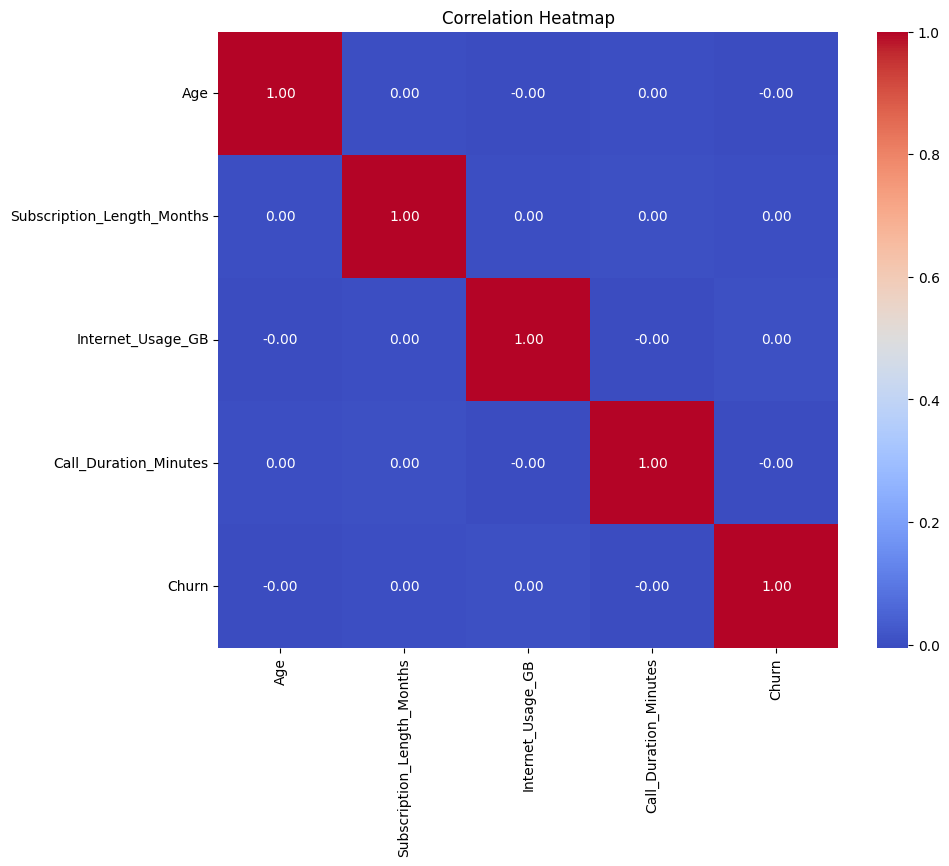

In [7]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png", bbox_inches='tight')
plt.show()


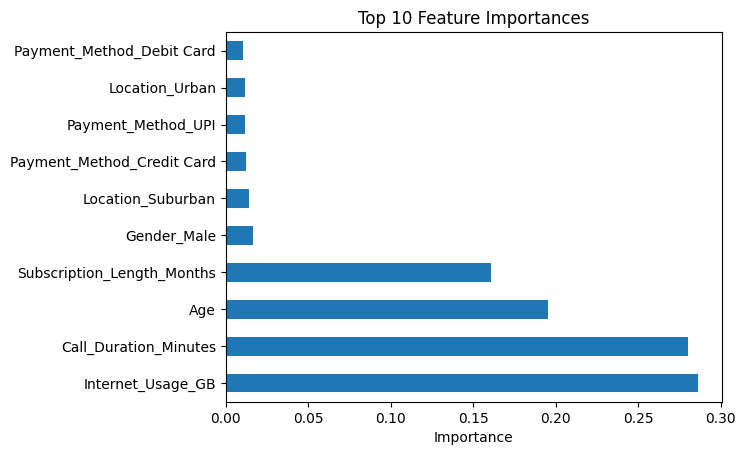

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Example feature selection and model
X = df.drop(columns=['Customer_ID', 'Churn'])
X = pd.get_dummies(X, drop_first=True)  # One-hot encode
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Plot
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.savefig("feature_importances.png", bbox_inches='tight')
plt.show()
